<div align="center" style="color:red;font-size:20px">Dimensionality Reduction using PCA and LDA and Determining policy Slab</div>

## Task1

In [248]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch #for plotting dendogram

In [249]:
df=pd.read_csv("DS2_C6_S5_Insurance_Data_Challenge.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [250]:
df1=df.copy()

In [251]:
df.shape

(1338, 7)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [253]:
c=df.select_dtypes(include="object").columns.tolist()

In [254]:
#checking for noise
for i in c:
    print(df[i].value_counts())
    print("---")

male      676
female    662
Name: sex, dtype: int64
---
no     1064
yes     274
Name: smoker, dtype: int64
---
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
---


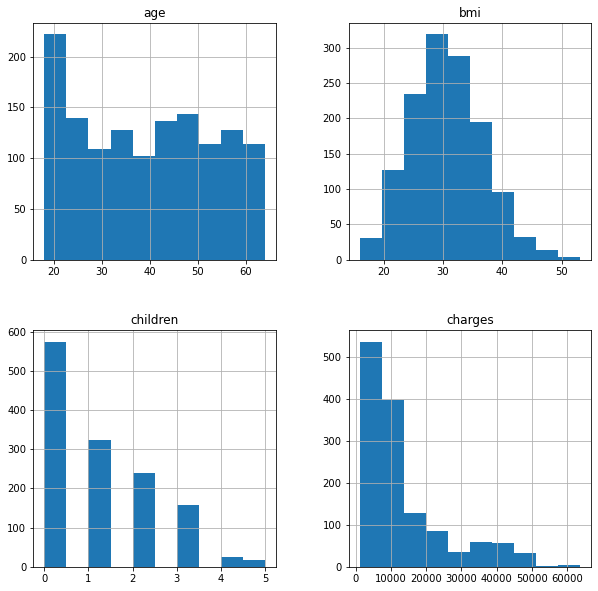

In [255]:
df.hist(figsize=(10,10))
plt.show()

In [256]:
#label encoding
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])

In [257]:
x=df.iloc[:,:-1]
y=df["charges"]

In [258]:
#scaling
x=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

In [259]:
#creating 3 bins for target y charges with range around 20000.1 indicates low charge and 3 indicates high charge
y=pd.cut(y,bins=3,labels=[1,2,3])

In [260]:
y.value_counts()

1    1099
2     185
3      54
Name: charges, dtype: int64

## Task2

In [261]:
# Performing EDA

In [262]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


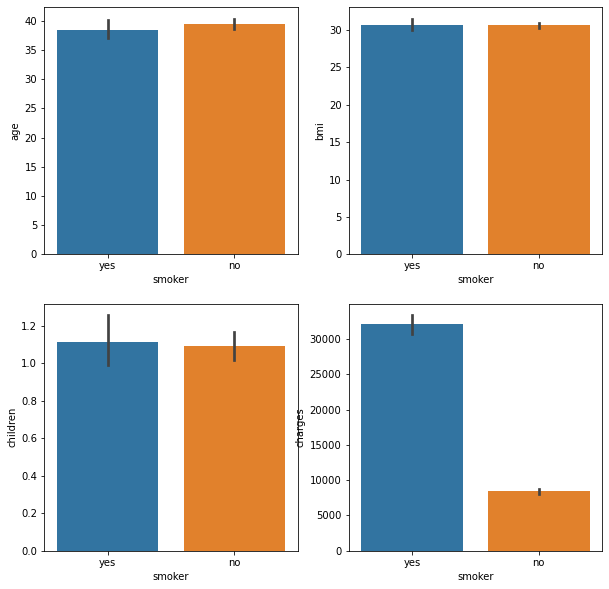

In [263]:
n=1
plt.figure(figsize=(10,10))
for i in df1.select_dtypes(exclude="object").columns.tolist():
    plt.subplot(2,2,n)
    sns.barplot(data=df1,y=i,x="smoker")
    n=n+1

In [264]:
#here we can see how mean of age,bmi,children and charges is distributed wrt smoker or non smoker
#except charges smoker doesnt have any influence on others
#and for charges if they are smoker they have high mean charges 

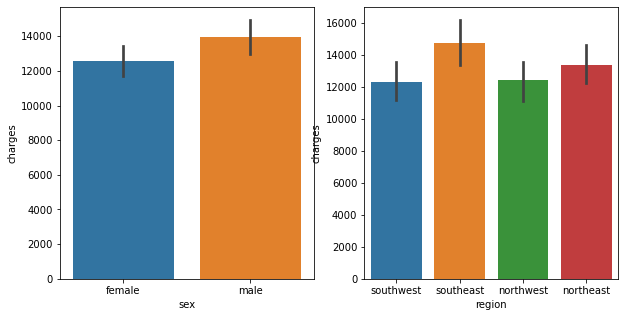

In [265]:
n=1
plt.figure(figsize=(10,5))
for i in df1[["sex","region"]]:
    plt.subplot(1,2,n)
    sns.barplot(data=df1,y="charges",x=i)
    n=n+1

In [266]:
#in the above plots we can see how charges varies wrt sex,region
#males have higher charges
#southeast region has highest mean charge

## Task3

In [267]:
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


In [268]:
#dimensionality reduction using pca and lda

In [269]:
pca=PCA(n_components=2)
r_x=pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.20060309, 0.1813664 ])

In [270]:
#reduced x
r_x

array([[ 0.4138055 ,  1.11914688],
       [-0.12275981,  0.8221422 ],
       [-0.62442365,  0.6374776 ],
       ...,
       [-0.01196397, -0.53097399],
       [ 0.65020071, -0.58750209],
       [ 0.10392973,  0.09896763]])

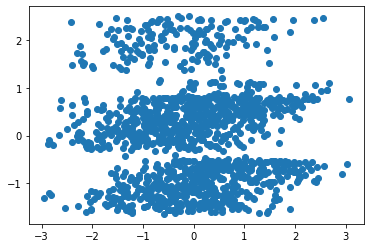

In [271]:
#how reduced data is scattered
plt.scatter(r_x[:,0],r_x[:,1])

In [272]:
#lda
lda=LinearDiscriminantAnalysis(n_components=2)
r_x_lda=lda.fit_transform(x,y)
lda.explained_variance_ratio_

array([0.97471278, 0.02528722])

In [273]:
r_x_lda

array([[ 2.0848753 ,  1.51848663],
       [-0.98776115,  0.45255309],
       [-0.77259556,  0.18796252],
       ...,
       [-0.83753956, -0.19417314],
       [-1.45668474,  0.9229873 ],
       [ 3.10251202, -0.23431836]])

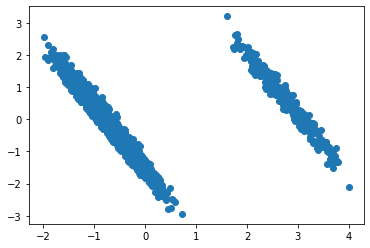

In [274]:
plt.scatter(r_x_lda[:,0],r_x_lda[:,1])

In [275]:
#from the reduced x visuals, lda is definetely best (we have passed y also into that)

## Task4

#### KMeans Clustering : Using Dimension Reduced data and original data

- reduced pca data

silhouette score: 0.35851590679123824


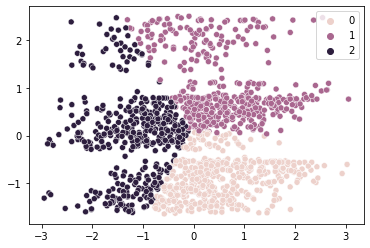

In [276]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3).fit(r_x)
labels=model.labels_
sns.scatterplot(r_x[:,0],r_x[:,1],hue=labels)
print("silhouette score:",silhouette_score(r_x,labels))

In [277]:
np.unique(labels,return_counts=True)

(array([0, 1, 2]), array([478, 434, 426], dtype=int64))

- reduced from lda data

silhouette score: 0.572754936583139


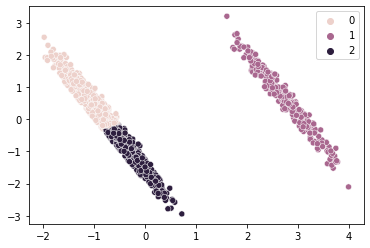

In [278]:
model=KMeans(n_clusters=3).fit(r_x_lda)
labels=model.labels_
sns.scatterplot(r_x_lda[:,0],r_x_lda[:,1],hue=labels)
print("silhouette score:",silhouette_score(r_x_lda,labels))

In [279]:
np.unique(labels,return_counts=True)

(array([0, 1, 2]), array([565, 274, 499], dtype=int64))

- original data

{2: 0.18163227880951408, 3: 0.1763006730637055, 4: 0.18942977457049412, 5: 0.1868863966526754, 6: 0.18208904247048147, 7: 0.18078723310801825, 8: 0.19717107506316023, 9: 0.20017059696415734}


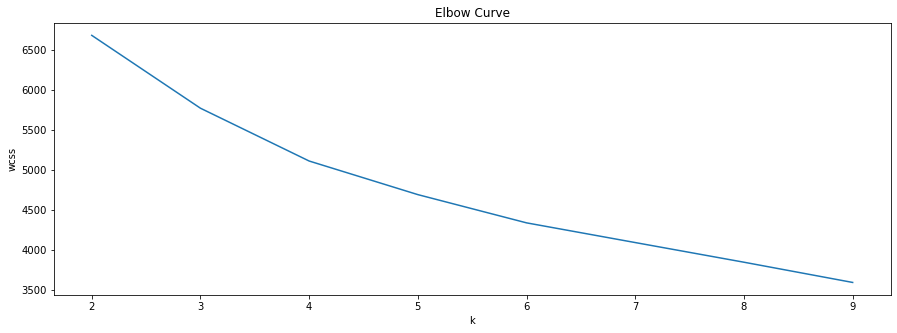

In [280]:
#finding optimal k and silhoutte
x1=x.copy()
wcss=[]
silhouette={}
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=1)
    model.fit(x1)
    wcss.append(model.inertia_)
    labels=model.labels_
    silhouette[i]=(silhouette_score(x1,labels))
print(silhouette)
#plotting elbow curve:k vs wcss
plt.figure(figsize=(15, 5))
plt.plot(range(2,10),wcss)
plt.xlabel("k")
plt.ylabel("wcss")
plt.title("Elbow Curve")
plt.show()

In [281]:
#n_clusters=3 according to elbow curve 
model2=KMeans(n_clusters=3).fit(x1)
labels2=model2.labels_
#silhouette score for original data
silhouette_score(x1,labels2)

0.20846454124863442

In [282]:
np.unique(labels2,return_counts=True)

(array([0, 1, 2]), array([274, 517, 547], dtype=int64))

#### Agglomerative Hierarchical clustering : Using Dimension Reduced data and original data

- pca reduced data

silhouette score: 0.3359188308270836


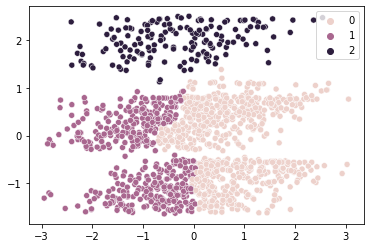

In [283]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=3).fit(r_x)
labels=model.labels_
sns.scatterplot(r_x[:,0],r_x[:,1],hue=labels)
print("silhouette score:",silhouette_score(r_x,labels))

In [284]:
np.unique(labels,return_counts=True)

(array([0, 1, 2], dtype=int64), array([712, 466, 160], dtype=int64))

- lda reduced data

silhouette score: 0.5425330769869555


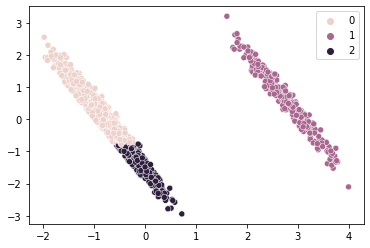

In [285]:
model=AgglomerativeClustering(n_clusters=3).fit(r_x_lda)
labels=model.labels_
sns.scatterplot(r_x_lda[:,0],r_x_lda[:,1],hue=labels)
print("silhouette score:",silhouette_score(r_x_lda,labels))

In [286]:
np.unique(labels,return_counts=True)

(array([0, 1, 2], dtype=int64), array([784, 274, 280], dtype=int64))

- original data

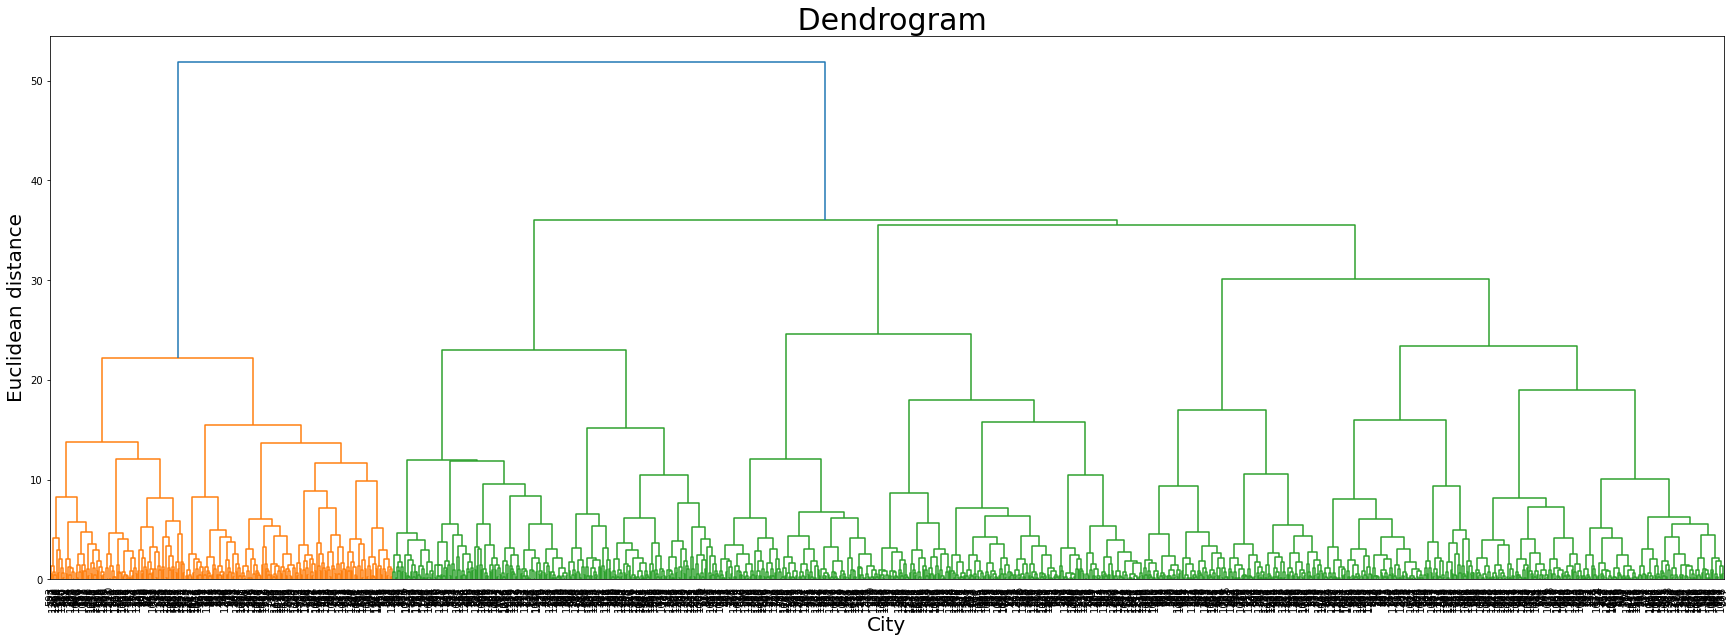

In [287]:
#using dendrogram to find number of clusters 
x2=x.copy()
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(x2, method = 'ward'))
ax = plt.gca()
#plt.axhline(y=15, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('City',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [288]:
#according to dendogram n_clusters=4 
model2=AgglomerativeClustering(n_clusters=4).fit(x2)
labels2=model2.labels_
#silhouette score for original data
silhouette_score(x2,labels2)

0.14863368319820638

In [289]:
np.unique(labels2,return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([464, 339, 261, 274], dtype=int64))

#### DBSCAN : Using Dimension Reduced  data and original data

- pca reduced data

In [1]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2).fit(r_x)
distances,indices=nn.kneighbors(r_x)
distances[:,1].sort()
plt.plot(distances[:,1])

NameError: name 'r_x' is not defined

In [ ]:
#considering eps around 0.1 to 0.2

In [291]:
#tunings eps and min samples
for eps in np.arange(0.1,0.2,0.05):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(r_x)
        labels=model.labels_
        if len(np.unique(labels))<10:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            #print(silhouette_score(r_x,labels))
            print("----")

0.1 **** 11
(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64), array([1236,   18,   11,   11,   17,   18,   16,   11], dtype=int64))
----
0.1 **** 12
(array([-1,  0,  1,  2], dtype=int64), array([1293,   12,   15,   18], dtype=int64))
----
0.1 **** 13
(array([-1,  0], dtype=int64), array([1325,   13], dtype=int64))
----
0.1 **** 14
(array([-1], dtype=int64), array([1338], dtype=int64))
----
0.15000000000000002 **** 8
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([338, 510, 432,  37,   6,   8,   7], dtype=int64))
----
0.15000000000000002 **** 9
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([371, 486, 424,  34,   9,   7,   7], dtype=int64))
----


silhouette score: -0.10217725159351479


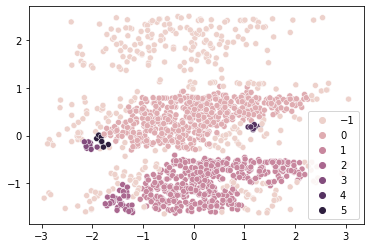

In [307]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.15,min_samples=9).fit(r_x)
labels=model.labels_
sns.scatterplot(r_x[:,0],r_x[:,1],hue=labels)
print("silhouette score:",silhouette_score(r_x,labels))

In [308]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([371, 486, 424,  34,   9,   7,   7], dtype=int64))

- lda reduced data

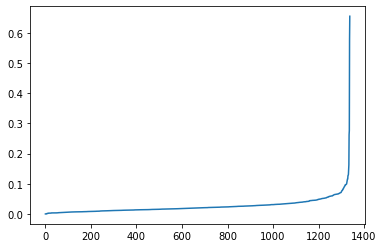

In [294]:
#k distance graph
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2).fit(r_x_lda)
distances,indices=nn.kneighbors(r_x_lda)
distances[:,1].sort()
plt.plot(distances[:,1])

In [ ]:
#considering eps around 0.075 and 0.1

In [304]:
#tunings eps and min samples
for eps in np.arange(0.075,0.1,0.001):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(r_x_lda)
        labels=model.labels_
        if len(np.unique(labels))<5:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            print(silhouette_score(r_x_lda,labels))
            print("----")

0.081 **** 14
(array([-1,  0,  1,  2], dtype=int64), array([460, 836,  23,  19], dtype=int64))
0.01597776064283738
----
0.082 **** 14
(array([-1,  0,  1,  2], dtype=int64), array([455, 840,  24,  19], dtype=int64))
0.020761583299507825
----
0.083 **** 14
(array([-1,  0,  1,  2], dtype=int64), array([451, 844,  24,  19], dtype=int64))
0.02350052437186909
----
0.084 **** 14
(array([-1,  0,  1,  2], dtype=int64), array([444, 851,  24,  19], dtype=int64))
0.0282291466550801
----
0.08700000000000001 **** 13
(array([-1,  0,  1,  2], dtype=int64), array([381, 902,  22,  33], dtype=int64))
0.08841519167308118
----
0.08700000000000001 **** 14
(array([-1,  0,  1,  2], dtype=int64), array([407, 882,  20,  29], dtype=int64))
0.07180230468174739
----
0.08800000000000001 **** 14
(array([-1,  0,  1,  2], dtype=int64), array([403, 884,  20,  31], dtype=int64))
0.07625168738213882
----
0.09000000000000001 **** 13
(array([-1,  0,  1,  2], dtype=int64), array([358, 940,  22,  18], dtype=int64))
0.3448479

silhouette score: 0.6582955252864081


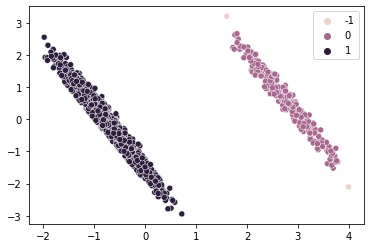

In [295]:
model=DBSCAN().fit(r_x_lda)
labels=model.labels_
sns.scatterplot(r_x_lda[:,0],r_x_lda[:,1],hue=labels)
print("silhouette score:",silhouette_score(r_x_lda,labels))

In [296]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1], dtype=int64), array([   2,  272, 1064], dtype=int64))

- original data

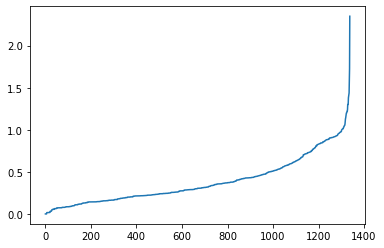

In [297]:
#k distance graph to select eps
x3=x.copy()
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2).fit(x3)
distances,indices=nn.kneighbors(x3)
distances[:,1].sort()
plt.plot(distances[:,1])


In [ ]:
#considering eps around 0.75 and 1

In [298]:
#tunings eps and min samples
for eps in np.arange(0.75,1,0.05):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(x3)
        labels=model.labels_
        if len(np.unique(labels))<10:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            print(silhouette_score(x3,labels))
            print("----")

0.9500000000000002 **** 7
(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64), array([237, 482, 510,  65,  19,   8,   7,  10], dtype=int64))
0.10353956203775011
----
0.9500000000000002 **** 8
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([296, 473, 503,  35,   7,  13,  11], dtype=int64))
0.09883259172833433
----
0.9500000000000002 **** 9
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([333, 460, 497,  26,  11,  11], dtype=int64))
0.09785204029726312
----
0.9500000000000002 **** 10
(array([-1,  0,  1,  2], dtype=int64), array([382, 449, 491,  16], dtype=int64))
0.09899281447673007
----
0.9500000000000002 **** 11
(array([-1,  0,  1], dtype=int64), array([419, 442, 477], dtype=int64))
0.14900141288255916
----
0.9500000000000002 **** 12
(array([-1,  0,  1], dtype=int64), array([443, 433, 462], dtype=int64))
0.14061900051806528
----
0.9500000000000002 **** 13
(array([-1,  0,  1,  2], dtype=int64), array([452, 428, 452,   6], dtype=int64))
0.06805526310955155
----
0.9500000

In [299]:
#clustering using eps=0.35 and min_samples=11
model2=DBSCAN(eps=0.95,min_samples=14).fit(x3)
labels=model2.labels_
#silhouette score for original data
silhouette_score(x3,labels)

0.12440064822346732

In [300]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1], dtype=int64), array([490, 419, 429], dtype=int64))

In [301]:
#PCA reduced the dataset into two features in which all data point were like clustered into 3 groups.
#but for n_clusters=3 since that was dataset suggested from elbow curve and silhoutte scores and also class labels was considered as 3,kmeans,agglomerative and dbscan were not able to cluster it properly.
#even tough dbmeans is good in arbitary shapes it gave less silhoutte score than other two algorithms.
#so for this dataset kmeans with reduced dataset gave better silhoutte score
#but compared to original data  pca reduction helped for clustering this dataset and is a good technique to use for this data since it gave better silhoutte score